In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load Stddevs
sigma_10percent_err = numpy.load("stddevs_10percent_err.npz")['stddevs']
sigma_750_err = numpy.load("stddevs_750.npz")['stddevs']
sigma_broad_beam = numpy.load("stddevs_broader.npz")['stddevs']
sigma_sidelobes = numpy.load("stddevs_sidelobes.npz")['stddevs']

In [3]:
sigma_10percent_err.shape

(252,)

In [4]:
time = numpy.arange(0,2*numpy.pi,0.025)
time = (time/(2*numpy.pi))*24

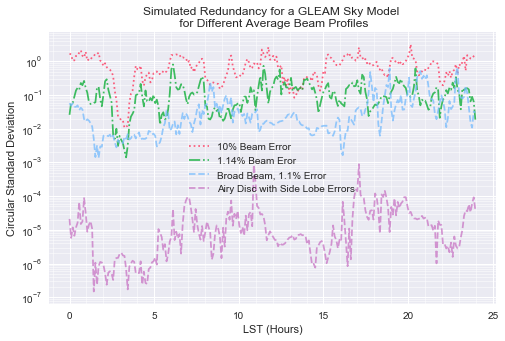

In [5]:
mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(time,sigma_10percent_err,label='10% Beam Error',color='xkcd:reddish pink',linestyle=':',alpha=0.75)
ax.plot(time,sigma_750_err,label='1.14% Beam Eror',color='xkcd:kelly green',linestyle='-.',alpha=0.75)
ax.plot(time,sigma_broad_beam,label='Broad Beam, 1.1% Error',color='xkcd:sky blue',linestyle='--',alpha=0.75)
ax.plot(time,sigma_sidelobes,label='Airy Disc with Side Lobe Errors',color='xkcd:orchid',linestyle='--',alpha=0.75)
ax.set_yscale('log')
ax.set_title("Simulated Redundancy for a GLEAM Sky Model \n for Different Average Beam Profiles")
ax.set_xlabel("LST (Hours)")
ax.set_ylabel("Circular Standard Deviation")
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.legend()
plt.savefig("simulated_redundancy.pdf")
plt.show()

## Next plot explores airy beam profiles more

In [6]:
sigma_airy_pointing = numpy.load("stddevs_airy_pointing_normal.npz")['stddevs']
sigma_airy_bw = numpy.load("stddevs_airy_bw_normal_dw.npz")['stddevs']
sigma_airy_pointing_bw = numpy.load("stddevs_airy_pointing_and_bw_normal_dw.npz")['stddevs']
sigma_airy_sidelobes = numpy.load("stddevs_sidelobes_normal.npz")['stddevs']
sigma_airy_primary_lobe = numpy.load("stddevs_primary_beam.npz")['stddevs']

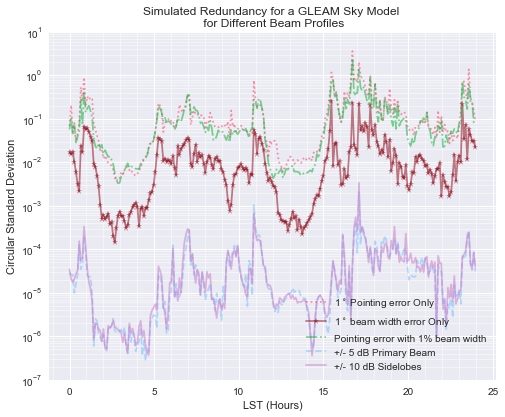

In [9]:
fig, ax = plt.subplots(figsize=(8, 6.4))

ax.plot(time,sigma_airy_pointing,label='1$^\circ$ Pointing error Only',color='xkcd:reddish pink',linestyle=':',alpha=0.5)
ax.plot(time,sigma_airy_bw,label='1$^\circ$ beam width error Only',color='xkcd:crimson',marker='*',alpha=0.5)
ax.plot(time,sigma_airy_pointing_bw,label='Pointing error with 1% beam width',color='xkcd:kelly green',linestyle='-.',alpha=0.5)
ax.plot(time,sigma_airy_primary_lobe,label='+/- 5 dB Primary Beam',color='xkcd:sky blue',linestyle='--',alpha=0.5)
ax.plot(time,sigma_airy_sidelobes, label='+/- 10 dB Sidelobes',color='xkcd:orchid',linestyle='-',alpha=0.5)
ax.set_yscale('log')
ax.set_title("Simulated Redundancy for a GLEAM Sky Model \n for Different Beam Profiles")
ax.set_xlabel("LST (Hours)")
ax.set_ylabel("Circular Standard Deviation")
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.set_ylim([10e-8,10.0])
ax.legend(loc=4)
plt.savefig("simulated_redundancy_airy.pdf")
plt.show()